# Exploratory Data Analysis - Car Manufacture Dataset

## Initial Data Preparation

In [1]:
# Importing libraries for preparation and exploration 
import numpy as np
import pandas as pd

# Libraries for visualisation
import seaborn as sns
import matplotlib as plt

In [2]:
# Fetching the data (remember to use raw format on GitHub)
import wget
wget.download(url='https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv')

URLError: <urlopen error [WinError 10054] An existing connection was forcibly closed by the remote host>

In [3]:
# Reading the data using appropriate 'read_' command
df = pd.read_csv('data.csv')

In [4]:
# Previewing first 5 rows
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### Points to note:
- Some series have inconsistent titles ('_' vs ' ', UPPER vs lower case)
- Same issue with series values (MANUAL vs premium unleaded (required), etc.)

In [5]:
# Normalising the data using string (str) methods
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
# Viewing importing information after the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11911 non-null  object 
 4   engine_hp          11845 non-null  float64
 5   engine_cylinders   11884 non-null  float64
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11908 non-null  float64
 9   market_category    8172 non-null   object 
 10  vehicle_size       11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
 12  highway_mpg        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  popularity         11914 non-null  int64  
 15  msrp               11914 non-null  int64  
dtypes: float64(3), int64(5

In [7]:
# More specifically, can use df.dtypes() to view different types of information stored for each series
df.select_dtypes('object')

,make,model,engine_fuel_type,transmission_type,driven_wheels,market_category,vehicle_size,vehicle_style
0,BMW,1 Series M,premium unleaded (required),MANUAL,rear wheel drive,"Factory Tuner,Luxury,High-Performance",Compact,Coupe
1,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,Performance",Compact,Convertible
2,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,High-Performance",Compact,Coupe
3,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,Performance",Compact,Coupe
4,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,Luxury,Compact,Convertible
...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,premium unleaded (required),AUTOMATIC,all wheel drive,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback
11910,Acura,ZDX,premium unleaded (required),AUTOMATIC,all wheel drive,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback
11911,Acura,ZDX,premium unleaded (required),AUTOMATIC,all wheel drive,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback
11912,Acura,ZDX,premium unleaded (recommended),AUTOMATIC,all wheel drive,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback


In [8]:
# Selecting all series which have object data type
df.dtypes[
    df.dtypes == 'object'
]
# Left row = index
# Right row = values

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [9]:
# Creating list of indecies
abc = list(df.dtypes[df.dtypes == 'object'].index)

In [10]:
# Lopping through and normalising string-type series
for i in abc:
    df[i] = df[i].str.lower().str.replace(' ','_')

In [11]:
# Checking normalised results
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## Exploratory Data Analysis

In [12]:
# Systematically previewing data
# Nice to preview and understand the unique values each series has
for i in df.columns:
    print(i)
    print(df[i].unique()[:5])
    print('Total number of unique values:', df[i].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
Total number of unique values: 48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
Total number of unique values: 914

year
[2011 2012 2013 1992 1993]
Total number of unique values: 28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
Total number of unique values: 10

engine_hp
[335. 300. 230. 320. 172.]
Total number of unique values: 356

engine_cylinders
[ 6.  4.  5.  8. 12.]
Total number of unique values: 9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
Total number of unique values: 5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
Total number of unique values: 4

number_of_doors
[ 2.  4.  3. nan]
Total number of unique values: 3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury

For quantities like 'MSRP' (Manufacture Suggested Retail Price) which are primarily unique values it is more helpful to visualise the data than read of quantities.

[Text(0.5, 0, 'MSRP (USD$)'), Text(0, 0.5, 'Count')]

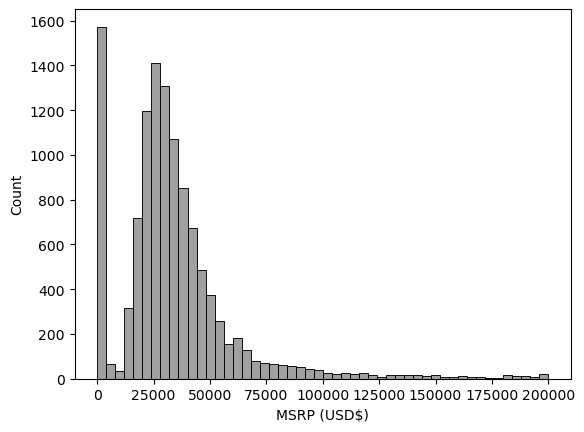

In [13]:
# Plotting histogram of MSRP data using Seaborn
# Long tail distribution so we zoom in
hist1 = sns.histplot(df.msrp, binrange= [0, 2e5], bins = 50, color='gray')
hist1.set(xlabel='MSRP (USD$)', ylabel='Count')

[Text(0.5, 0, 'MSRP (USD$)'), Text(0, 0.5, 'Count')]

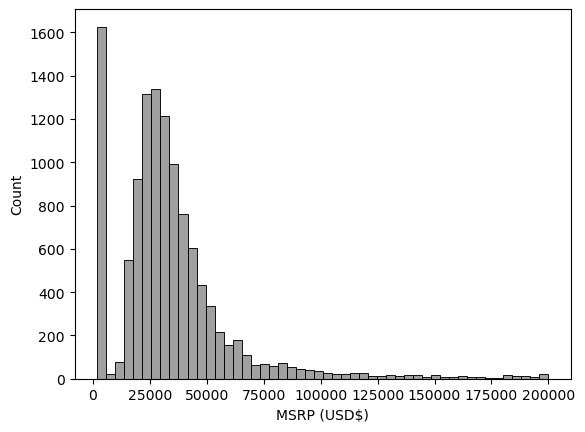

In [14]:
# Alternate to binrange[] one can simply index .msrp
hist1 = sns.histplot(df.msrp[df.msrp < 2e5], bins = 50, color='gray')
hist1.set(xlabel='MSRP (USD$)', ylabel='Count')

Long tail distributions are not desirable for training models, therefore we want to omit the long tail.



We can use the logarithmic distribution to transform our current data into something more desirable.


NOTE: Logarithmic conversion does not work for negative or zero values. (Could add 1 to solution in case of 0 values. Use log1p.)

<Axes: xlabel='msrp', ylabel='Count'>

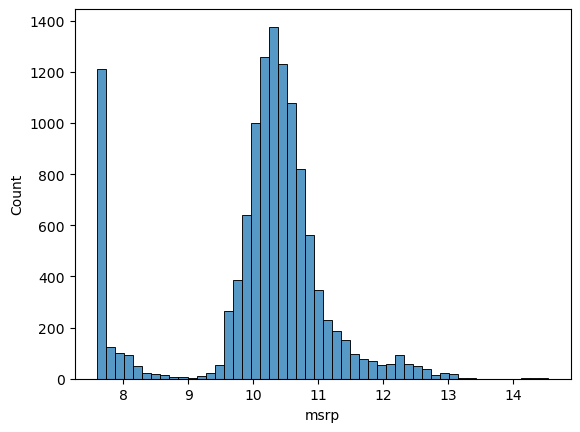

In [15]:
# Plotting logarithmic distribution of MSRP. One can also use log1p to add 1 to each MSRP value
sns.histplot(np.log(df.msrp), bins=50)

New curve is moreso reflective of a normal distribution / bell-shaped curve which are more ideal for modelling.

### Checking for missing values

In [16]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

We must be considerate of missing values when training our model later on.


Ideas:
- If object is int64 or float: calculate the mean and replace NAN values with this average.

### Initialising Validation Framework (60/20/20)

In [3]:
# Lengths of different splits
# n = len(df)
n = 10

# n_val = int(len(df)*0.2)
# n_test = n_val
# n_train = n - n_val - n_test

In [18]:
# Subsetting the dataframe using iloc.() which fetches rows based on the index.
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In order to have unbiased and well-mixed splits we shuffle the data.


For reproducable results one usually employs a seed which others can use.

In [7]:
# Defining index
idx = np.arange(n)

In [6]:
# Shuffling index using numpy.random library
np.random.seed(2)
np.random.shuffle(idx)

In [21]:
# Replace unshuffled splits with shuffled splits
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [22]:
# Dropping index to avoid confusion
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [23]:
# View MSRP of shuffled training set
df_train.msrp

0        14410
1        19685
2        19795
3         2000
4        56260
         ...  
7145     54900
7146     29215
7147     34675
7148    303300
7149     37820
Name: msrp, Length: 7150, dtype: int64

In [24]:
# Take the log of training set MSRP values
np.log(df_train.msrp)

0        9.575678
1        9.887612
2        9.893185
3        7.600902
4       10.937739
          ...    
7145    10.913269
7146    10.282438
7147    10.453774
7148    12.622478
7149    10.540593
Name: msrp, Length: 7150, dtype: float64

In [25]:
# Convert log values straight to numpy array
y_train = np.log(df_train.msrp.values)

We have now deduced the target vector for our training set (the MSRP values)

In [26]:
# Repeating for validation and test splits
y_val = np.log(df_val.msrp.values)
y_test = np.log(df_test.msrp.values)

Finally, we want to remove the now-target-vector from our to-be feature matrix!

In [27]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

## Linear Regression

A model used for solving regression problems (models which output a number, i.e. MSRP)

In [28]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

Choosing a few features:

In [29]:
xi = [453, 11, 86]
xi

[453, 11, 86]

In [30]:
w0 = 7.170
w = [0.01, 0.04, 0.002]

In [31]:
# Defining function for linear regression

def linear_regression(xi):
    n = len(xi)
    
    # Initial predicition
    pred = w0

    # Features with weightings
    for j in range(n):
        pred = pred + w[j] * xi[j]

    return pred

In [32]:
# Calling the function
ans = linear_regression(xi)
ans

12.312

In [33]:
# Taking the exponent
ans_price = np.exp(ans)
ans_price

222348.2221101062

## Linear Regression Vector Form

In [34]:
# Defining function for dot product (Sigma)
def dot(xi, w):
    n = len(xi)

    res = 0.0

    for j in range(n):
        res = res + xi[j] * w[j]

    return res 

In [35]:
# Simplified regression function
def linear_regression(xi):
    return w0 + dot(xi,w)

w = [w0, w1, ... , wn]

xi = [1, x1, x2, ... , xn]

In [36]:
# Appending w0 to start of w
w_new = [w0] + w
w_new

[7.17, 0.01, 0.04, 0.002]

In [37]:
# Further simplified regression function
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi,w_new)

In [38]:
linear_regression(xi)

12.312

Same result as previously.

In [39]:
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

In [40]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [41]:
# Outputs predictions
X.dot(w_new)

array([12.38 , 13.552, 12.312])

In [42]:
# In function notations
def linear_regression(X):
    return X.dot(w_new)

In [43]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

In [44]:
# Taking the exponent
np.exp(X.dot(w_new))

array([237993.82334859, 768349.51018973, 222348.22211011])

In [152]:
def train_linear_regression(X,y):
    # Formatting the feature matrix
    ones = np.ones(X.shape[0])      # Array of ones with same number of rows as X
    X = np.column_stack([ones, X])  # Appending column of 1s

    # Calculating the baseline and weights
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

### Baseline is the value (target) of the car when no other information is know (w0)

## Using the Model

In [165]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7150 entries, 0 to 7149
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               7150 non-null   object 
 1   model              7150 non-null   object 
 2   year               7150 non-null   int64  
 3   engine_fuel_type   7149 non-null   object 
 4   engine_hp          7110 non-null   float64
 5   engine_cylinders   7136 non-null   float64
 6   transmission_type  7150 non-null   object 
 7   driven_wheels      7150 non-null   object 
 8   number_of_doors    7144 non-null   float64
 9   market_category    4899 non-null   object 
 10  vehicle_size       7150 non-null   object 
 11  vehicle_style      7150 non-null   object 
 12  highway_mpg        7150 non-null   int64  
 13  city_mpg           7150 non-null   int64  
 14  popularity         7150 non-null   int64  
dtypes: float64(3), int64(4), object(8)
memory usage: 838.0+ KB


In [137]:
# Using just the numerical values except for year
df_train_num = df_train._get_numeric_data()
del df_train_num['year']
df_train_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7150 entries, 0 to 7149
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   engine_hp         7110 non-null   float64
 1   engine_cylinders  7136 non-null   float64
 2   number_of_doors   7144 non-null   float64
 3   highway_mpg       7150 non-null   int64  
 4   city_mpg          7150 non-null   int64  
 5   popularity        7150 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 335.3 KB


In [138]:
df_train_num.isnull().sum()

engine_hp           40
engine_cylinders    14
number_of_doors      6
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [139]:
df_train_num = df_train_num.fillna(0).values

In [140]:
w0, w = train_linear_regression(df_train_num,y_train)

[[1.000e+00 1.480e+02 4.000e+00 ... 3.300e+01 2.400e+01 1.385e+03]
 [1.000e+00 1.320e+02 4.000e+00 ... 3.200e+01 2.500e+01 2.031e+03]
 [1.000e+00 1.480e+02 4.000e+00 ... 3.700e+01 2.800e+01 6.400e+02]
 ...
 [1.000e+00 2.850e+02 6.000e+00 ... 2.200e+01 1.700e+01 5.490e+02]
 [1.000e+00 5.630e+02 1.200e+01 ... 2.100e+01 1.300e+01 8.600e+01]
 [1.000e+00 2.000e+02 4.000e+00 ... 3.100e+01 2.200e+01 8.730e+02]]
[[7.15000000e+03 1.77096800e+06 4.01640000e+04 2.45160000e+04
  1.90791000e+05 1.41417000e+05 1.10134780e+07]
 [1.77096800e+06 5.26312546e+08 1.10523090e+07 6.00590300e+06
  4.42938430e+07 3.19585650e+07 2.76719913e+09]
 [4.01640000e+04 1.10523090e+07 2.48592000e+05 1.36254000e+05
  1.00038400e+06 7.25427000e+05 6.26973600e+07]
 [2.45160000e+04 6.00590300e+06 1.36254000e+05 8.97160000e+04
  6.59146000e+05 4.90156000e+05 3.72809930e+07]
 [1.90791000e+05 4.42938430e+07 1.00038400e+06 6.59146000e+05
  5.70730700e+06 4.29308600e+06 2.92392631e+08]
 [1.41417000e+05 3.19585650e+07 7.25427000

In [141]:
y_pred = (w0 + df_train_num.dot(w))

<Axes: ylabel='Count'>

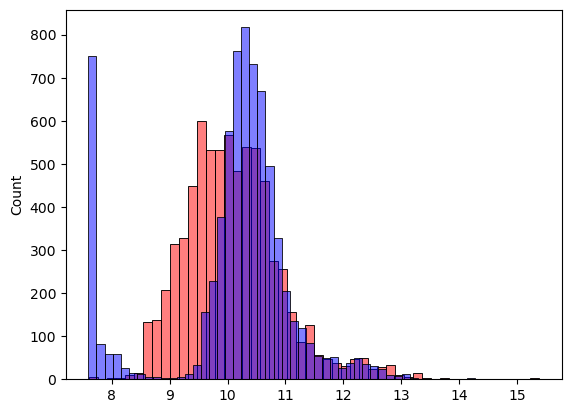

In [142]:
sns.histplot(y_pred, bins=50, color='red', alpha=0.5)
sns.histplot(y_train, bins=50, color='blue', alpha=0.5)

From inspection we may claim that our model is 'good' or 'not good', however, we need an objective way of measuring our model's accuracy. One method is to use RMSE (Root Mean Squared Error), a statistical formula.

In [134]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [144]:
rmse(y_train, y_pred)

0.7377705172487306

## Validating the data set

Having trained our model, we now apply to the validation data

In [154]:
# Simple function to prepare set data for training
def prepare_X(df):
    df_num = df._get_numeric_data()
    del df_num['year']
    
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [155]:
# Training the model and then validating on validation data set
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

# Calculating the RMSE
print('RMSE: ' ,rmse(y_val, y_pred))

RMSE:  0.7458112108504208


## Simple Feature Engineering

In [156]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7150 entries, 0 to 7149
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               7150 non-null   object 
 1   model              7150 non-null   object 
 2   year               7150 non-null   int64  
 3   engine_fuel_type   7149 non-null   object 
 4   engine_hp          7110 non-null   float64
 5   engine_cylinders   7136 non-null   float64
 6   transmission_type  7150 non-null   object 
 7   driven_wheels      7150 non-null   object 
 8   number_of_doors    7144 non-null   float64
 9   market_category    4899 non-null   object 
 10  vehicle_size       7150 non-null   object 
 11  vehicle_style      7150 non-null   object 
 12  highway_mpg        7150 non-null   int64  
 13  city_mpg           7150 non-null   int64  
 14  popularity         7150 non-null   int64  
dtypes: float64(3), int64(4), object(8)
memory usage: 838.0+ KB


In [161]:
# Calculate age using max(year) - year
df_train.year.max()
abs(df_train.year.max() - df_train.year)

0        9
1        5
2        1
3       26
4        0
        ..
7145     2
7146     2
7147     2
7148     3
7149     0
Name: year, Length: 7150, dtype: int64

In [171]:
# Adding a new feature 'age' to the feature matrix
# Simple function to prepare set data for training
def prepare_X(df):
    df = df.copy()
    
    # Numerical option values (say 2, 3 or 4) can be expressed through binary arrays (categorical variables)
    for val in [2, 3, 4]:
    df_train['num_doors_%s' % val] = (df_train.number_of_doors == val).astype('int')

    df_num = df._get_numeric_data()
    df_num['age'] = df_num.year.max() - df_num.year
    del df_num['year']
    
    df_num = df_num.fillna(0) 
    X = df_num
    return X

In [177]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [173]:
# Training the model and then validating on validation data set
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

# Calculating the RMSE
print('RMSE: ' ,rmse(y_val, y_pred))

RMSE:  0.5168894208784214


<Axes: ylabel='Count'>

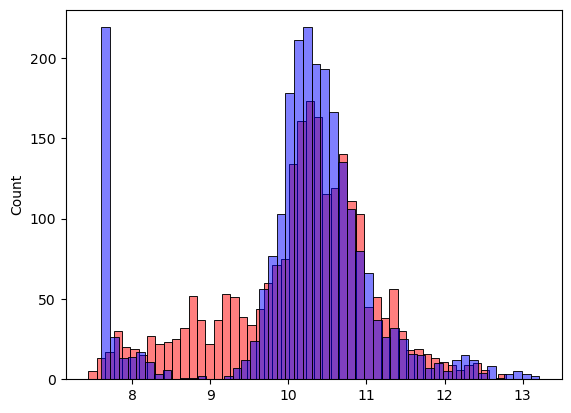

In [179]:
sns.histplot(y_pred, color = 'red', bins = 50, alpha = .5)
sns.histplot(y_val, color = 'blue', bins = 50, alpha = .5)

## Categorical Variables

Typically string ('object'-type) variables

In [186]:
sort = ['popularity','city_mpg','highway_mpg','engine_hp','engine_cylinders']
df_train_num = df_train[sort]

In [203]:
# Numerical option values (say 2, 3 or 4) can be expressed through binary arrays (categorical variables)
for val in [2, 3, 4]:
    df_train['num_doors_%s' % val] = (df_train.number_of_doors == val).astype('int')

In [206]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,num_doors_2,num_doors_3,num_doors_4
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,1,0,0
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,0,0,1
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,0,0,1
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,0,1,0
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,0,0,1


In [216]:
# Adding a new feature 'age' to the feature matrix
# Simple function to prepare set data for training
def prepare_X(df):
    df = df.copy()    
    features = sort.copy()

    df['age'] = df.year.max() - df.year 
    features.append('age')
    
    # Numerical option values (say 2, 3 or 4) can be expressed through binary arrays (categorical variables)
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)

    df_num = df[features]
    df_num = df_num.fillna(0) 
    X = df_num

    return X

In [218]:
prepare_X(df_train)

,popularity,city_mpg,highway_mpg,engine_hp,engine_cylinders,age,num_doors_2,num_doors_3,num_doors_4
0,1385,24,33,148.0,4.0,9,1,0,0
1,2031,25,32,132.0,4.0,5,0,0,1
2,640,28,37,148.0,4.0,1,0,0,1
3,873,16,18,90.0,4.0,26,0,1,0
4,5657,15,21,385.0,8.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
7145,3916,20,31,300.0,6.0,2,1,0,0
7146,873,24,30,210.0,4.0,2,1,0,0
7147,549,17,22,285.0,6.0,2,0,0,1
7148,86,13,21,563.0,12.0,3,0,0,1


In [219]:
# Training the model and then validating on validation data set
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

# Calculating the RMSE
print('RMSE: ' ,rmse(y_val, y_pred))

RMSE:  0.5158653516079938


Not much improvement, so categorising the number of doors wasn't too useful

In [240]:
pop_makes = list(df.make.value_counts().head(20).index)

In [241]:
# Adding a new feature 'age' to the feature matrix
# Simple function to prepare set data for training
def prepare_X(df):
    df = df.copy()    
    features = sort.copy()

    df['age'] = df.year.max() - df.year 
    features.append('age')
    
    # Numerical option values (say 2, 3 or 4) can be expressed through binary arrays (categorical variables)
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)

    # Numerical option values (say 2, 3 or 4) can be expressed through binary arrays (categorical variables)
    for v in pop_makes:
        df['make_%s' % v] = (df.make == v).astype('int')
        features.append('make_%s' % v)

    df_num = df[features]
    df_num = df_num.fillna(0) 
    X = df_num

    return X

In [242]:
# Training the model and then validating on validation data set
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

# Calculating the RMSE
print('RMSE: ' ,rmse(y_val, y_pred))

RMSE:  0.4858906251762099


In [256]:
categorical_variables = [
    'make', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 
    'market_category', 'vehicle_size', 'vehicle_style'
]

In [290]:
categories = {}

for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head().index)


In [260]:
categories

{'make': ['chevrolet',
  'ford',
  'volkswagen',
  'toyota',
  'dodge',
  'nissan',
  'gmc',
  'honda',
  'mazda',
  'cadillac',
  'mercedes-benz',
  'suzuki',
  'bmw',
  'infiniti',
  'audi',
  'hyundai',
  'volvo',
  'subaru',
  'acura',
  'kia'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel',
  'electric',
  'flex-fuel_(premium_unleaded_required/e85)',
  'flex-fuel_(premium_unleaded_recommended/e85)',
  'flex-fuel_(unleaded/natural_gas)',
  'natural_gas'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback',
  'performance',
  'crossover,luxury',
  'luxury,high-performance',
  'exotic,high-performance',
  'hatchback,performance'

In [277]:
# Adding a new feature 'age' to the feature matrix
# Simple function to prepare set data for training
def prepare_X(df):
    df = df.copy()    
    features = sort.copy()

    df['age'] = df.year.max() - df.year 
    features.append('age')
    
    # Numerical option values (say 2, 3 or 4) can be expressed through binary arrays (categorical variables)
    for v in [2, 3, 4]:
        df['num_doors_%d' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%d' % v)
        
    # Need to create 2 loops. Outer loop over the keys. Inner loop over values
    for c, values in categories.items():
        for v in values:
            df['%s_%s' % (c, v)] = (df[c] == v).astype('int')
            features.append('%s_%s' % (c, v))

    df_num = df[features]
    df_num = df_num.fillna(0) 
    X = df_num

    return X

In [271]:
prepare_X(df_train)

,popularity,city_mpg,highway_mpg,engine_hp,engine_cylinders,age,num_doors_2,num_doors_3,num_doors_4,make_chevrolet,...,"market_category_luxury,performance",market_category_hatchback,vehicle_size_compact,vehicle_size_midsize,vehicle_size_large,vehicle_style_sedan,vehicle_style_4dr_suv,vehicle_style_coupe,vehicle_style_convertible,vehicle_style_4dr_hatchback
0,1385,24,33,148.0,4.0,9,1,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,2031,25,32,132.0,4.0,5,0,0,1,0,...,0,1,1,0,0,0,0,0,0,1
2,640,28,37,148.0,4.0,1,0,0,1,0,...,0,1,1,0,0,0,0,0,0,1
3,873,16,18,90.0,4.0,26,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,5657,15,21,385.0,8.0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,3916,20,31,300.0,6.0,2,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
7146,873,24,30,210.0,4.0,2,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7147,549,17,22,285.0,6.0,2,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
7148,86,13,21,563.0,12.0,3,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0


In [278]:
# Training the model and then validating on validation data set
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

# Calculating the RMSE
print('RMSE: ' ,rmse(y_val, y_pred))

RMSE:  180.66451852496223


In [273]:
w0

3.6004870338302694e+17

In [298]:
def train_linear_regression_reg(X, y, r):
    # Formatting the feature matrix
    ones = np.ones(X.shape[0])      # Array of ones with same number of rows as X
    X = np.column_stack([ones, X])  # Appending column of 1s

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [299]:
# Adding a new feature 'age' to the feature matrix
# Simple function to prepare set data for training
def prepare_X(df):
    df = df.copy()    
    features = sort.copy()

    df['age'] = df.year.max() - df.year 
    features.append('age')
    
    # Numerical option values (say 2, 3 or 4) can be expressed through binary arrays (categorical variables)
    for v in [2, 3, 4]:
        df['num_doors_%d' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%d' % v)
        
    # Need to create 2 loops. Outer loop over the keys. Inner loop over values
    for c, values in categories.items():
        for v in values:
            df['%s_%s' % (c, v)] = (df[c] == v).astype('int')
            features.append('%s_%s' % (c, v))

    df_num = df[features]
    df_num = df_num.fillna(0) 
    X = df_num

    return X

In [302]:
# Training the model and then validating on validation data set
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, 0.000001)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

# Calculating the RMSE
print('RMSE: ' ,rmse(y_val, y_pred))

RMSE:  0.4565804944959672


<Axes: ylabel='Count'>

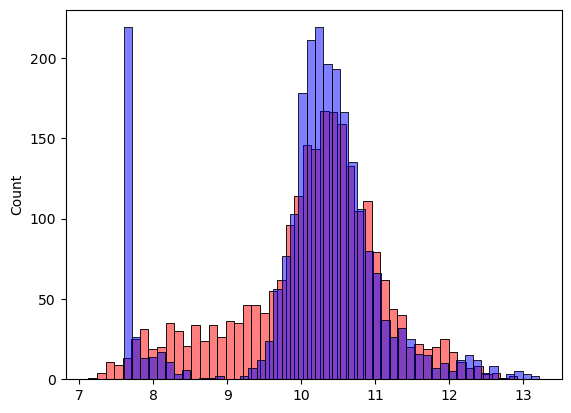

In [292]:
sns.histplot(y_pred, alpha = .5, color = 'red', bins = 50)
sns.histplot(y_val, alpha = .5, color = 'blue', bins = 50)

## Tuning the Model (Finding a value for 'r' (regularization value))

In [320]:
for r in [0.0, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]:
    # Training the model and then validating on validation data set
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)

    # Calculating the RMSE
    print('r: {0:<6} bias: {1:<22} RMSE: {2:<10}'.format(r, w0, rmse(y_val, y_pred)))

r: 0.0    bias: 3.6004870338302694e+17 RMSE: 932.4617493946612
r: 1e-06  bias: 67.60057846632739      RMSE: 0.4565804944959672
r: 1e-05  bias: 6.220577991893736      RMSE: 0.456580249024715
r: 0.0001 bias: 6.345722512090179      RMSE: 0.45658026169332383
r: 0.001  bias: 6.285418082110448      RMSE: 0.4565807078227218
r: 0.01   bias: 6.276680164814558      RMSE: 0.45658518948307236
r: 0.1    bias: 6.191280550327902      RMSE: 0.4566324759053258
r: 1      bias: 5.634959905264118      RMSE: 0.4572836136076939
r: 10     bias: 4.2840134712899935     RMSE: 0.47020822359723075
r: 100    bias: 2.499051714950482      RMSE: 0.578724624948324


0.001 and 0.01 seem like sensible choices for 'r'; they offer a good balance between bias and accuracy + bias hasn't begun to fluctate at this point (is relatively stable)

## Using the Model

In [325]:
# Want to combine 2 datasets: df_train & df_val
df_full_train = pd.concat([df_train, df_val])
df_full_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9532 entries, 0 to 2381
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               9532 non-null   object 
 1   model              9532 non-null   object 
 2   year               9532 non-null   int64  
 3   engine_fuel_type   9531 non-null   object 
 4   engine_hp          9476 non-null   float64
 5   engine_cylinders   9511 non-null   float64
 6   transmission_type  9532 non-null   object 
 7   driven_wheels      9532 non-null   object 
 8   number_of_doors    9526 non-null   float64
 9   market_category    6520 non-null   object 
 10  vehicle_size       9532 non-null   object 
 11  vehicle_style      9532 non-null   object 
 12  highway_mpg        9532 non-null   int64  
 13  city_mpg           9532 non-null   int64  
 14  popularity         9532 non-null   int64  
dtypes: float64(3), int64(4), object(8)
memory usage: 1.2+ MB


In [328]:
df_full_train = df_full_train.reset_index(drop = True)
df_full_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870
9528,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238
9529,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624
9530,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436


In [330]:
X_full_train = prepare_X(df_full_train)
X_full_train

,popularity,city_mpg,highway_mpg,engine_hp,engine_cylinders,age,num_doors_2,num_doors_3,num_doors_4,make_chevrolet,...,"market_category_luxury,performance",market_category_hatchback,vehicle_size_compact,vehicle_size_midsize,vehicle_size_large,vehicle_style_sedan,vehicle_style_4dr_suv,vehicle_style_coupe,vehicle_style_convertible,vehicle_style_4dr_hatchback
0,1385,24,33,148.0,4.0,9,1,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,2031,25,32,132.0,4.0,5,0,0,1,0,...,0,1,1,0,0,0,0,0,0,1
2,640,28,37,148.0,4.0,1,0,0,1,0,...,0,1,1,0,0,0,0,0,0,1
3,873,16,18,90.0,4.0,26,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,5657,15,21,385.0,8.0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,870,25,37,240.0,4.0,2,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
9528,238,13,20,444.0,8.0,2,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
9529,1624,20,23,332.0,8.0,4,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
9530,436,24,34,148.0,4.0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0


In [331]:
# Want to combine train and val target vectors
y_full_train = np.concatenate([y_train, y_val])
y_full_train

array([ 9.57567769,  9.8876122 ,  9.89318466, ..., 11.21754719,
        9.77537005, 10.19241884])

In [332]:
# Training the model on the full training set
w0, w = train_linear_regression_reg(X_full_train, y_full_train, 0.01)

In [333]:
# Evaluating against the test data set
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)

# Calculating the RMSE
print('RMSE: ' ,rmse(y_test, y_pred))

RMSE:  0.45184138354018205


We now want to PREDICT THE PRICE of ANY car from our test data set using our linear regression model.

In [336]:
# Requests usually come in the form of a dictionary!!! (Through web services, etc.)
car = df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [338]:
# Create a small dataframe because that is what our functions are expecting
df_small = pd.DataFrame([car])

In [339]:
X_small = prepare_X(df_small)

In [346]:
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

10.656385789888887

In [363]:
print('Predicted price: {0:<12} $'.format(np.exp(y_pred)))
print('Actual price:    {0:>5} $'.format(np.exp(y_test[20])))

Predicted price: 42462.88969798698 $
Actual price:    34999.99999999997 $
